<a href="https://colab.research.google.com/github/ankitojha1999/DataMiningAssignment_Pycaret/blob/main/Multiclass_Classification_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 856.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 930.6 kB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [61]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')
print(data['Class variable'].unique())

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[1 0]


In [62]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [63]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [64]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [67]:
# init setup on exp
exp.setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [68]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0530
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0380
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0360
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2640
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0340
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1890
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.2450
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1880
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0500
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.3260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [69]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0670
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0630
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0340
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2810
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0760
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1770
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1310
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1930
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0330
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.5370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

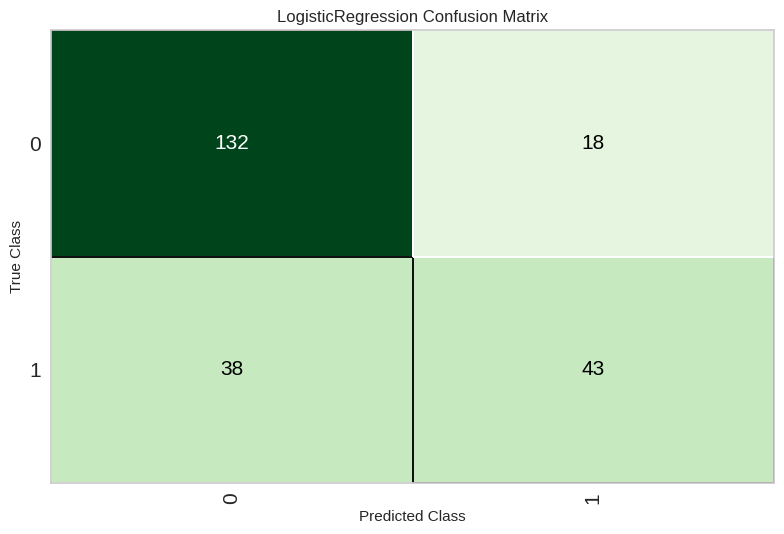

In [70]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

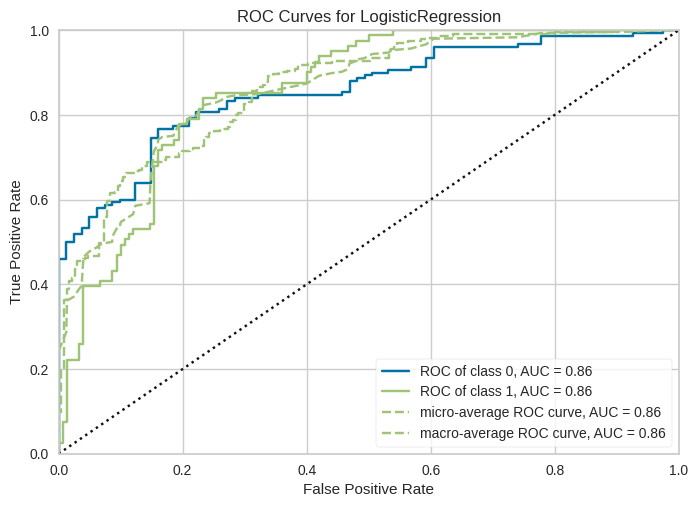

In [71]:
# plot AUC
plot_model(best, plot = 'auc')

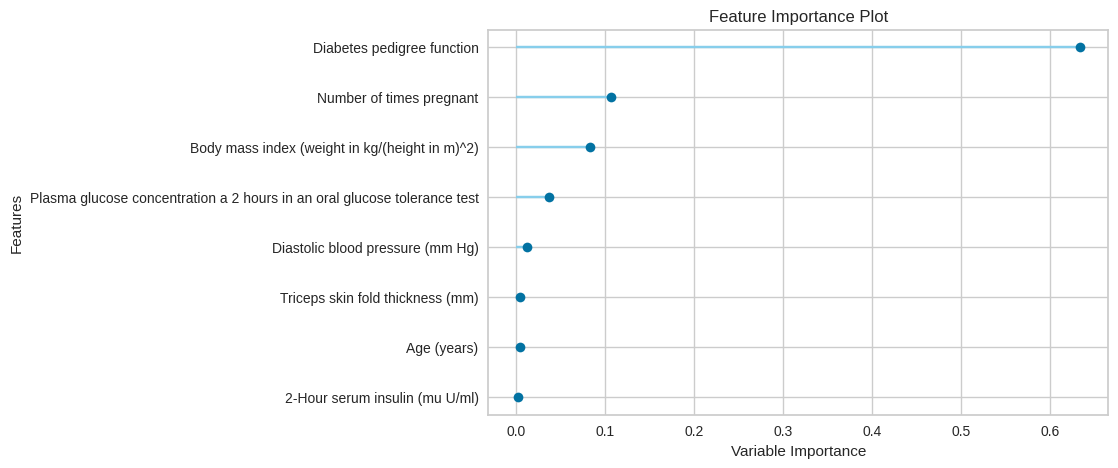

In [74]:
# plot feature importance
plot_model(best, plot = 'feature')

In [75]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [76]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


In [78]:
# show predictions df
holdout_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6393


In [79]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [80]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,0.6940
1,1,85,66,29,0,26.600000,0.351,31,0,0.9419
2,8,183,64,0,0,23.299999,0.672,32,1,0.7976
3,1,89,66,23,94,28.100000,0.167,21,0,0.9454
4,0,137,40,35,168,43.099998,2.288,33,1,0.8394


In [81]:
# save pipeline
save_model(best, 'Diabetes Prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

In [82]:
# load pipeline
loaded_best_pipeline = load_model('Diabetes Prediction')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diab...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [83]:
s = setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [84]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [85]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
323,13.0,152.0,90.0,33.0,29.0,26.799999,0.731,43.0
448,0.0,104.0,64.0,37.0,64.0,33.599998,0.510,22.0
84,5.0,137.0,108.0,0.0,0.0,48.799999,0.227,37.0
529,0.0,111.0,65.0,0.0,0.0,24.600000,0.660,31.0
329,6.0,105.0,70.0,32.0,68.0,30.799999,0.122,37.0
...,...,...,...,...,...,...,...,...
327,10.0,179.0,70.0,0.0,0.0,35.099998,0.200,37.0
57,0.0,100.0,88.0,60.0,110.0,46.799999,0.962,31.0
112,1.0,89.0,76.0,34.0,37.0,31.200001,0.192,23.0
751,1.0,121.0,78.0,39.0,74.0,39.000000,0.261,28.0


In [86]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [89]:
# init setup with normalize = True

s = setup(data, target = 'Class variable', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


<Axes: >

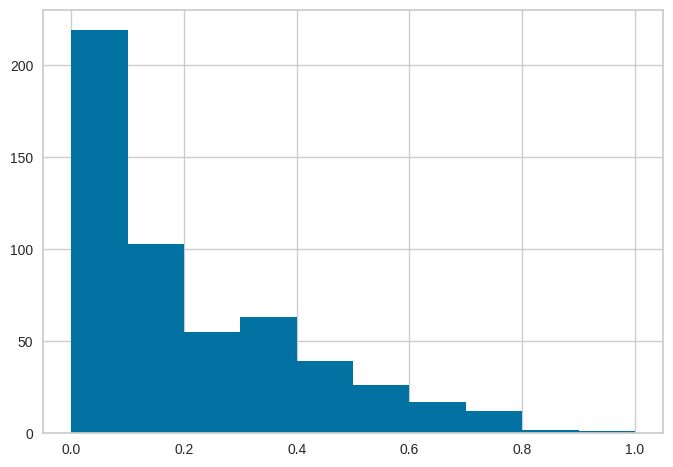

In [91]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Age (years)'].hist()

<Axes: >

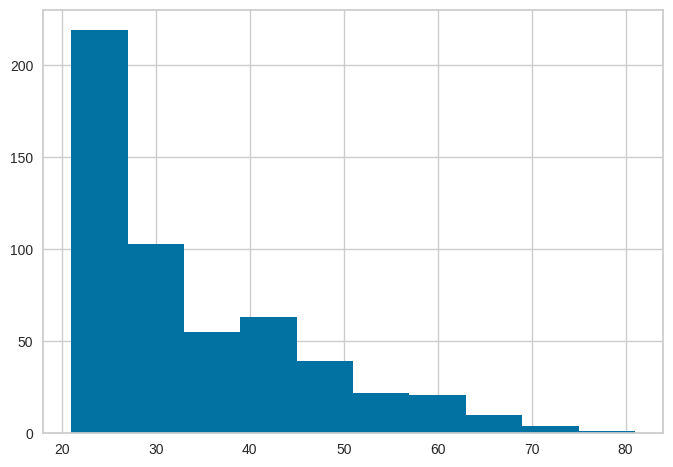

In [92]:
get_config('X_train')['Age (years)'].hist()

In [93]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7708,0.8071,0.5392,0.7353,0.6203,0.4618,0.4744,0.0390
lr,Logistic Regression,0.7689,0.8071,0.4959,0.7614,0.5968,0.4453,0.4673,0.6990
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0590
svm,SVM - Linear Kernel,0.7521,0.8005,0.5070,0.7363,0.5796,0.4154,0.4398,0.0410
rf,Random Forest Classifier,0.7485,0.7917,0.5336,0.6784,0.5946,0.4164,0.4245,0.2380
nb,Naive Bayes,0.7427,0.7957,0.5702,0.6543,0.6043,0.4156,0.4215,0.0390
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.2180
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1380
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.3480
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [94]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [95]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7485,0.7917,0.5336,0.6784,0.5946,0.4164,0.4245,0.3790
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1780
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1960
lightgbm,Light Gradient Boosting Machine,0.7113,0.7653,0.5181,0.6036,0.5533,0.3427,0.3479,0.1330
knn,K Neighbors Classifier,0.7002,0.7433,0.4860,0.5965,0.5311,0.3142,0.3210,0.0520
dt,Decision Tree Classifier,0.6947,0.6526,0.5137,0.5665,0.5343,0.3103,0.3130,0.0670
xgboost,Extreme Gradient Boosting,0.6891,0.7572,0.5292,0.5668,0.5438,0.3089,0.3122,0.0920


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [96]:
compare_tree_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [97]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7485,0.7917,0.5336,0.6784,0.5946,0.4164,0.4245,0.379
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.178
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.196
lightgbm,Light Gradient Boosting Machine,0.7113,0.7653,0.5181,0.6036,0.5533,0.3427,0.3479,0.133
knn,K Neighbors Classifier,0.7002,0.7433,0.4860,0.5965,0.5311,0.3142,0.3210,0.052
dt,Decision Tree Classifier,0.6947,0.6526,0.5137,0.5665,0.5343,0.3103,0.3130,0.067
xgboost,Extreme Gradient Boosting,0.6891,0.7572,0.5292,0.5668,0.5438,0.3089,0.3122,0.092


In [98]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7427,0.7957,0.5702,0.6543,0.6043,0.4156,0.4215,0.0360
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.3060
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0590
ridge,Ridge Classifier,0.7708,0.8071,0.5392,0.7353,0.6203,0.4618,0.4744,0.0430
rf,Random Forest Classifier,0.7485,0.7917,0.5336,0.6784,0.5946,0.4164,0.4245,0.2380
xgboost,Extreme Gradient Boosting,0.6891,0.7572,0.5292,0.5668,0.5438,0.3089,0.3122,0.0940
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0360
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1380
lightgbm,Light Gradient Boosting Machine,0.7113,0.7653,0.5181,0.6036,0.5533,0.3427,0.3479,0.3910
dt,Decision Tree Classifier,0.6947,0.6526,0.5137,0.5665,0.5343,0.3103,0.3130,0.0800


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [99]:
best_recall_models_top3

[GaussianNB(priors=None, var_smoothing=1e-09),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001)]

In [100]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [101]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.9038,0.5789,0.8462,0.6875,0.5624,0.5828
1,0.8333,0.7985,0.6316,0.8571,0.7273,0.6112,0.6260
2,0.8519,0.9383,0.6316,0.9231,0.7500,0.6499,0.6736
3,0.7222,0.7759,0.4211,0.6667,0.5161,0.3350,0.3524
4,0.8333,0.9083,0.5789,0.9167,0.7097,0.6010,0.6322
5,0.6852,0.6737,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7222,0.7820,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7547,0.8460,0.3333,0.8571,0.4800,0.3579,0.4263
8,0.7358,0.6952,0.4444,0.6667,0.5333,0.3592,0.3736


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [102]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.9038,0.5789,0.8462,0.6875,0.5624,0.5828
1,0.8333,0.7985,0.6316,0.8571,0.7273,0.6112,0.6260
2,0.8519,0.9383,0.6316,0.9231,0.7500,0.6499,0.6736
3,0.7222,0.7759,0.4211,0.6667,0.5161,0.3350,0.3524
4,0.8333,0.9083,0.5789,0.9167,0.7097,0.6010,0.6322
5,0.6852,0.6737,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7222,0.7820,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7547,0.8460,0.3333,0.8571,0.4800,0.3579,0.4263
8,0.7358,0.6952,0.4444,0.6667,0.5333,0.3592,0.3736


In [103]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8101,0.8526,0.5714,0.8372,0.6792,0.5510,0.5713
1,0.7486,0.7921,0.5000,0.6889,0.5794,0.4065,0.4172
2,0.7486,0.7805,0.4194,0.7429,0.5361,0.3815,0.4108
Mean,0.7691,0.8084,0.4969,0.7563,0.5983,0.4464,0.4664
Std,0.0290,0.0316,0.0621,0.0613,0.0599,0.0747,0.0742


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [104]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8872,0.4737,0.9000,0.6207,0.4992,0.5472
1,0.8148,0.8030,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.8519,0.9353,0.5789,1.0000,0.7333,0.6406,0.6865
3,0.7037,0.7684,0.3684,0.6364,0.4667,0.2812,0.3013
4,0.8519,0.9038,0.5789,1.0000,0.7333,0.6406,0.6865
5,0.6852,0.6737,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7222,0.7624,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7547,0.8302,0.3333,0.8571,0.4800,0.3579,0.4263
8,0.7358,0.6952,0.3333,0.7500,0.4615,0.3193,0.3654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.6774,0.5263,0.6250,0.5714,0.3682,0.3711
1,0.7222,0.7015,0.6316,0.6000,0.6154,0.3982,0.3985
2,0.7407,0.7038,0.5789,0.6471,0.6111,0.4176,0.4190
3,0.5926,0.5053,0.2105,0.3636,0.2667,0.0116,0.0125
4,0.7778,0.7684,0.7368,0.6667,0.7000,0.5242,0.5259
5,0.6296,0.5940,0.4737,0.4737,0.4737,0.1880,0.1880
6,0.6296,0.5699,0.3684,0.4667,0.4118,0.1469,0.1491
7,0.8302,0.7770,0.6111,0.8462,0.7097,0.5940,0.6098
8,0.6604,0.6079,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [107]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.8135,0.6842,0.8667,0.7647,0.6588,0.6686
1,0.7593,0.6940,0.4737,0.7500,0.5806,0.4236,0.4456
2,0.7593,0.7782,0.8421,0.6154,0.7111,0.5132,0.5318
3,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8333,0.7632,0.5263,1.0000,0.6897,0.5902,0.6470
5,0.6296,0.5820,0.4211,0.4706,0.4444,0.1680,0.1685
6,0.7222,0.6654,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7358,0.6246,0.2778,0.8333,0.4167,0.2973,0.3725
8,0.6604,0.5675,0.2778,0.5000,0.3571,0.1512,0.1633


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [108]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [109]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8008,0.7368,0.6364,0.6829,0.4906,0.4940
1,0.6667,0.7444,0.5263,0.5263,0.5263,0.2692,0.2692
2,0.7593,0.8241,0.5263,0.7143,0.6061,0.4384,0.4490
3,0.6667,0.6293,0.4211,0.5333,0.4706,0.2322,0.2357
4,0.8333,0.8962,0.6842,0.8125,0.7429,0.6209,0.6259
5,0.6667,0.6534,0.5789,0.5238,0.5500,0.2863,0.2872
6,0.6296,0.6759,0.3158,0.4615,0.3750,0.1248,0.1293
7,0.7736,0.7698,0.6111,0.6875,0.6471,0.4812,0.4830
8,0.6415,0.6817,0.4444,0.4706,0.4571,0.1899,0.1900


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [110]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.8135,0.6842,0.8667,0.7647,0.6588,0.6686
1,0.7593,0.6940,0.4737,0.7500,0.5806,0.4236,0.4456
2,0.7593,0.7782,0.8421,0.6154,0.7111,0.5132,0.5318
3,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8333,0.7632,0.5263,1.0000,0.6897,0.5902,0.6470
5,0.6296,0.5820,0.4211,0.4706,0.4444,0.1680,0.1685
6,0.7222,0.6654,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.7358,0.6246,0.2778,0.8333,0.4167,0.2973,0.3725
8,0.6604,0.5675,0.2778,0.5000,0.3571,0.1512,0.1633


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [111]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [112]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Number '
                                                                          'of '
                                                                          'times '
                                                                          'pregnant',
                                                                          'Plasma '
                                                                          'glucose '
                                                                          'concentration '
                                                                          'a 2 '
                                                                          'hours '
                                                                          'in '
                                                                          'an '
                                                                          'oral '
                                                                          'glucose '
                                                                          'tolerance '
                                                                          'test',
                                                                          'Diastolic '
                                                                          'blood '
                                                                          'p...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                    

In [113]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.8383,0.5263,0.6667,0.5882,0.4028,0.4088
1,0.7963,0.7797,0.7368,0.7000,0.7179,0.5587,0.5591
2,0.7593,0.7669,0.4737,0.7500,0.5806,0.4236,0.4456
3,0.7222,0.7842,0.5263,0.6250,0.5714,0.3682,0.3711
4,0.8148,0.8421,0.7368,0.7368,0.7368,0.5940,0.5940
5,0.6852,0.6759,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7037,0.7677,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.7925,0.8405,0.4444,0.8889,0.5926,0.4734,0.5245
8,0.6792,0.6659,0.5000,0.5294,0.5143,0.2751,0.2754


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [114]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.6895,0.5789,0.6111,0.5946,0.3836,0.3839
1,0.7222,0.6774,0.5263,0.6250,0.5714,0.3682,0.3711
2,0.7593,0.7421,0.6842,0.6500,0.6667,0.4785,0.4788
3,0.6111,0.5436,0.3158,0.4286,0.3636,0.0928,0.0950
4,0.8148,0.8211,0.8421,0.6957,0.7619,0.6126,0.6201
5,0.5926,0.5654,0.4737,0.4286,0.4500,0.1278,0.1282
6,0.6667,0.6226,0.4737,0.5294,0.5000,0.2512,0.2520
7,0.7925,0.7484,0.6111,0.7333,0.6667,0.5178,0.5223
8,0.6604,0.6214,0.5000,0.5000,0.5000,0.2429,0.2429


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [115]:
# top 3 models based on recall
best_recall_models_top3

[GaussianNB(priors=None, var_smoothing=1e-09),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001)]

In [116]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8932,0.6842,0.7222,0.7027,0.5479,0.5484
1,0.7778,0.8120,0.6316,0.7059,0.6667,0.5008,0.5025
2,0.8704,0.9338,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.7037,0.7865,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8704,0.8962,0.6842,0.9286,0.7879,0.6976,0.7145
5,0.7037,0.6677,0.4737,0.6000,0.5294,0.3175,0.3223
6,0.7407,0.7789,0.6842,0.6190,0.6500,0.4449,0.4463
7,0.7736,0.8667,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6889,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Naive Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_wei...
                                                         n_iter_no_change=None,
                                                         random_state=123,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False)),
                             ('Linear Discriminant Analysis',
                              LinearDiscriminantAnalysis(covariance_estimator=None,
                                                         n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [117]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8992,0.6316,0.8000,0.7059,0.5735,0.5820
1,0.7778,0.8030,0.6316,0.7059,0.6667,0.5008,0.5025
2,0.8704,0.9248,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.7037,0.7895,0.4737,0.6000,0.5294,0.3175,0.3223
4,0.8519,0.8992,0.6316,0.9231,0.7500,0.6499,0.6736
5,0.6852,0.6677,0.4211,0.5714,0.4848,0.2656,0.2720
6,0.7222,0.7835,0.5263,0.6250,0.5714,0.3682,0.3711
7,0.7547,0.8667,0.3889,0.7778,0.5185,0.3776,0.4184
8,0.6981,0.6857,0.4444,0.5714,0.5000,0.2886,0.2933


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Naive Bayes',
                                GaussianNB(priors=None, var_smoothing=1e-09)),
                               ('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,...
                                                           solver='svd',
                                                           store_covariance=False,
                                                           tol=0.0001))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

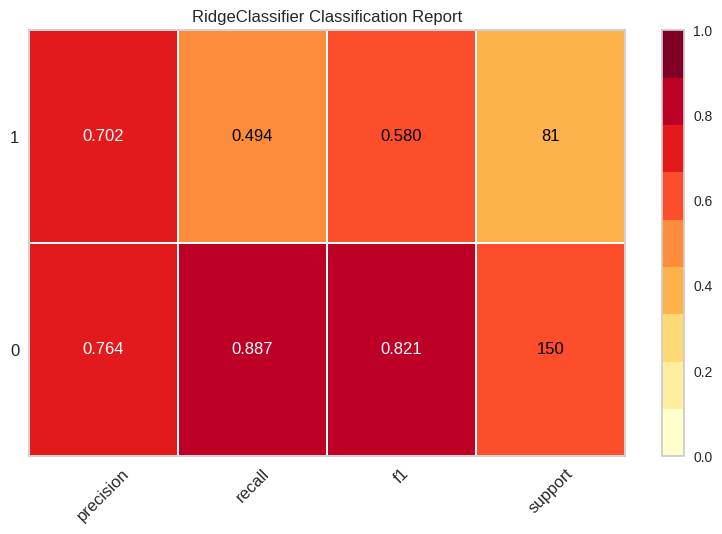

In [118]:
# plot class report
plot_model(best, plot = 'class_report')

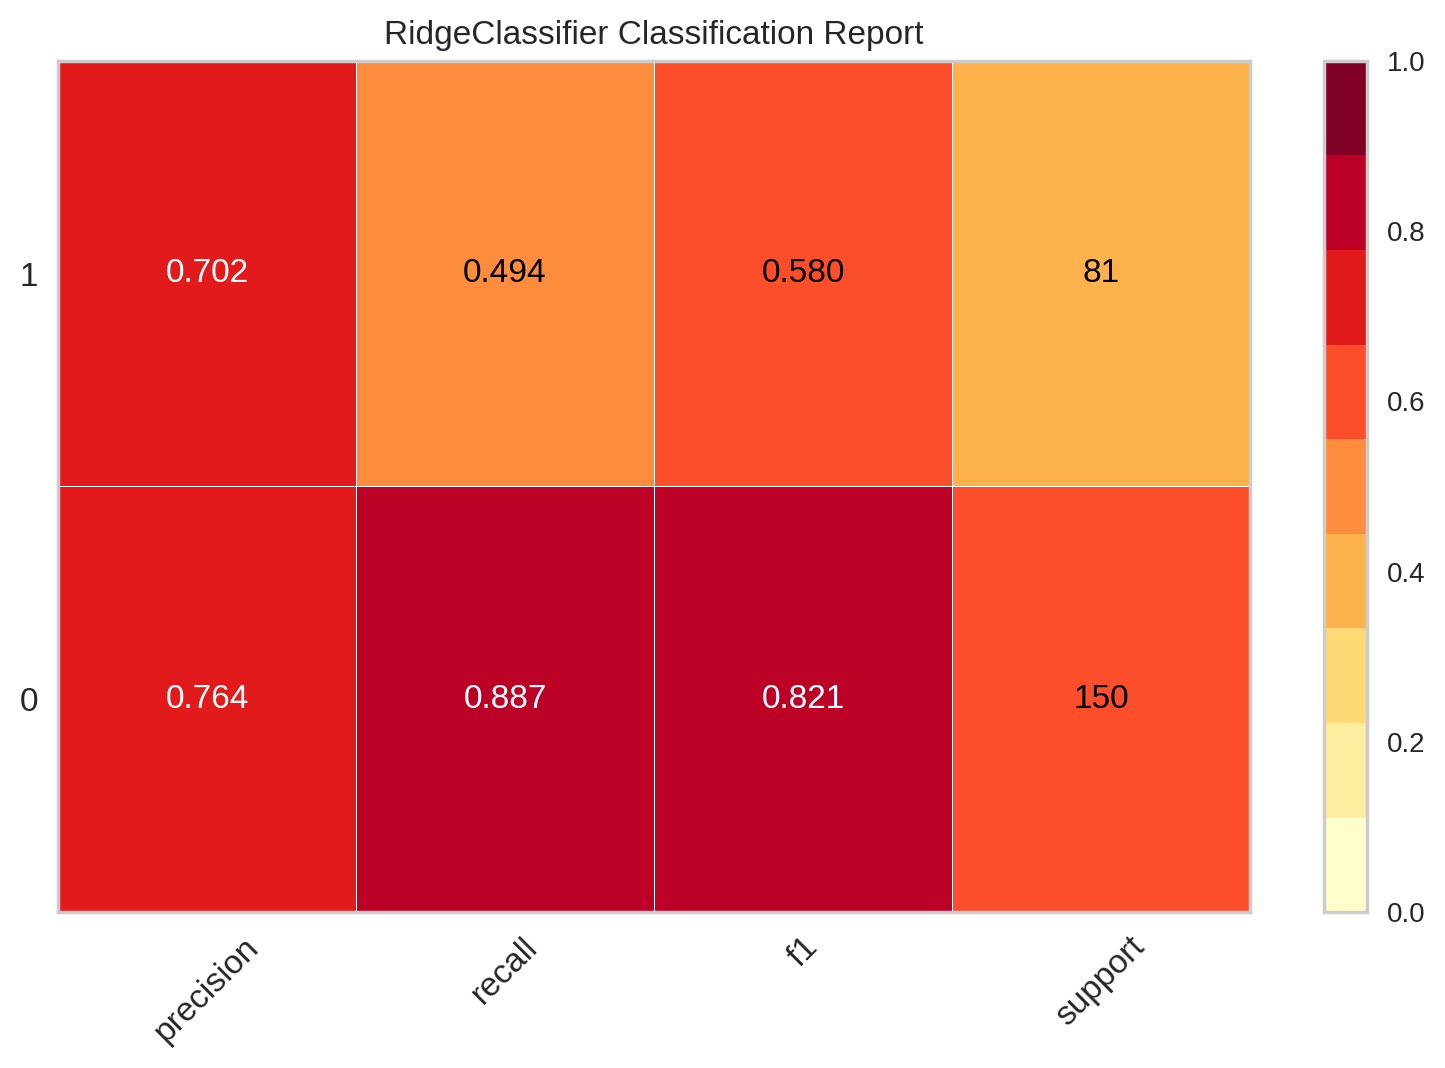

In [119]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [120]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [121]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8376,0.4737,0.6429,0.5455,0.3520,0.3605
1,0.7593,0.7865,0.7368,0.6364,0.6829,0.4906,0.4940
2,0.6667,0.8301,0.4211,0.5333,0.4706,0.2322,0.2357
3,0.6852,0.7639,0.5263,0.5556,0.5405,0.3014,0.3016
4,0.7778,0.8406,0.6842,0.6842,0.6842,0.5128,0.5128
5,0.6481,0.6887,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7407,0.7338,0.5263,0.6667,0.5882,0.4028,0.4088
7,0.8491,0.8603,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.6604,0.6952,0.5000,0.5000,0.5000,0.2429,0.2429


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [122]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/54 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.7689,0.8071,0.4959,0.7614,0.5968,0.4453,0.4673
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7002,0.7433,0.4860,0.5965,0.5311,0.3142,0.3210
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.7427,0.7957,0.5702,0.6543,0.6043,0.4156,0.4215
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.6947,0.6526,0.5137,0.5665,0.5343,0.3103,0.3130
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.7521,0.8005,0.5070,0.7363,0.5796,0.4154,0.4398
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7708,0.8071,0.5392,0.7353,0.6203,0.4618,0.4744
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7485,0.7917,0.5336,0.6784,0.5946,0.4164,0.4245
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017


In [123]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diabetes pedigre...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ['trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)]],
         verbose=False)

In [124]:
automl()

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [125]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cd43c8b0fda1f5376f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [126]:
# create api
create_api(best, api_name = 'Diabetes Prediction API')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python Diabetes Prediction API.py


In [127]:
create_docker('Diabetes Prediction API')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [128]:
final_best = finalize_model(best)

In [ ]:
final_best

In [129]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[1] <= 0.7160803973674774) {
            if (input[5] <= 0.40760059654712677) {
                if (input[2] <= 0.8245614171028137) {
                    if (input[1] <= 0.5351758897304535) {
                        var0 = new double[] {1.0, 0.0};
                    } else {
                        if (input[0] <= 0.08823529444634914) {
                            var0 = new double[] {1.0, 0.0};
                        } else {
                            if (input[1] <= 0.5402010083198547) {
                                var0 = new double[] {0.0, 1.0};
                            } else {
                                if (input[6] <= 0.09265584498643875) {
                                    if (input[6] <= 0.07429547235369682) {
                                        if (input[4] <= 0.13416075706481934) {
                                            var0 = new double[]

In [130]:
# save model
save_model(best, 'Diabetes Prediction API')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                                     transformer=MinMaxScaler(clip=False,
                                              

In [131]:
# load model
loaded_from_disk = load_model('Diabetes Prediction API')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diab...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=123,
                                 solver='auto', tol=0.0001))],
         verbose=False)

In [132]:
# save experiment
save_experiment('Diabetes_experiment')

In [133]:
# load experiment from disk
exp_from_disk = load_experiment('Diabetes_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple
